In [1]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
import numpy as np
import math
import time


In [126]:
class Body(plt.Circle):

    G = 0.0002 #`Gravitational` constant.Can be the real value or free choice
    signal_speed = 0.3
    def __init__(self, x,y,mass,radius = 0.2,color='green'):
        self.x = x
        self.y = y
        self.mass = mass
        self.body = plt.Circle((self.x,self.y), radius = radius, color = color)
        self.velocity = np.array([0,0])
        self.position_hystory = [[x,y]]
        self.signal_start_moments = [0]
        
    def __eq__(self, other):
        if self.mass == other.mass and self.body.radius == other.body.radius:
            return True
        return False
    
    @staticmethod
    def calc_acceleration(M,r):
        return Body.G * M/r**2

    @staticmethod
    def distance(point1,point2):
        return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)
    
    @staticmethod
    def first_derivative(M,r):
        return 2 * Body.G * M/ r **3
    
    @staticmethod
    def escape_velocity(M,r):
        return math.sqrt((2 * M * Body.G)/ r)
    
    @staticmethod
    def vectors_calculations(body, other_object_x, other_object_y, other_object_mass):
           dist = body.distance([body.x, body.y], [other_object_x, other_object_y])
           dist_vector = [other_object_x- body.x, other_object_y - body.y]            
           first_deriv = body.first_derivative(other_object_mass, dist)    
           velocity_vector = np.array([dist_vector[0] * first_deriv, dist_vector[1] * first_deriv])    
           body.velocity = body.velocity + velocity_vector
           body.x += body.velocity[0]
           body.y += body.velocity[1]

    @staticmethod
    def calc_new_positions(frame,*bodies, newtonian_physics=True):
        for body in bodies:
            for other_body in bodies:
                if body != other_body:
                    if newtonian_physics:
                        
                         body.vectors_calculations(body,other_body.x,other_body.y,other_body.mass)
                    else:
                        
                        dist = body.distance([body.x,body.y], [other_body.position_hystory[0][0], other_body.position_hystory[0][1]])#                 
                        curr_time_interval = frame - other_body.signal_start_moments[0]               
                        signal_dist = dist - body.signal_speed * curr_time_interval
                        
                        if signal_dist <= 0:
                            other_body_x = other_body.position_hystory[0][0]
                            other_body_y = other_body.position_hystory[0][1]
                            other_body_mass = other_body.mass
                            
                            body.vectors_calculations(body,other_body_x,other_body_y,other_body_mass)
                            
                            del other_body.signal_start_moments[0]
                            del other_body.position_hystory[0]


In [129]:

circleA = Body(0,0,200,radius= 0.6)

circleB = Body(10,10, 20, radius= 0.3,color='red')

# circleC = Body(-10, -10, 40,radius = 0.4, color= 'blue')

circleA.velocity = np.array([0, 0])
circleB.velocity = np.array([-0.05, 0])
# circleC.velocity = np.array([0.04, -0.02])

bodies = [circleA, circleB]


fig = plt.figure(figsize= (5,5))
ax = fig.add_subplot(111)
for body in bodies:
    ax.add_artist(body.body)


lines = plt.plot([])
line = lines[0]


plt.xlim(-30,30)
plt.ylim(-30,30)

def animate(frame):
    if frame >0:     
        [b.signal_start_moments.append(frame) for b in bodies]     
        circleA.calc_new_positions(frame,*bodies,newtonian_physics=False)
        [b.position_hystory.append([b.x, b.y]) for b in bodies]
        for body in bodies:
            body.body.center = (body.x, body.y)
            line.set_data((body.x,body.y))

   
 

anim = FuncAnimation(fig, animate,frames=200,interval = 10)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()


In [ ]:
def calc_distance(v1,v2):
    return math.sqrt((v1[0] - v2[0]) **2 + (v1[1] - v2[1])**2)

A = np.array([0,0])
B = np.array([3,3])
d = circleA.distance(A,B)
print(d)
print(A)
print(B)
print(A+(-1)* B)
plt.xlim(0,6)
plt.ylim(0,6)
plt.scatter(0,0)
plt.scatter(3,3)
result = plt.quiver(3,3,-3,-3, angles = "xy", scale_units = "xy", scale = 1, color = 'green')
print(f'Result vector: {result.__doc__}')
# plt.quiver(0,0,1,1, angles = "xy", scale_units = "xy", scale = 1, color = 'red')
# plt.quiver(0,0,3,3, angles = "xy", scale_units = "xy", scale = 1, color = 'blue')

plt.show()


In [ ]:
# Векторите
v1 = np.array([1, 1])
v2 = np.array([3, 2])

# Изчисляване на сумата
v_sum = v1 + v2

# Начертаване на графиката
plt.figure()
plt.plot([0, v1[0]], [0, v1[1]], '-r', label='v1') # Червената линия е v1
plt.plot([0, v2[0]], [0, v2[1]], '-b', label='v2') # Синята линия е v2
plt.plot([0, v_sum[0]], [0, v_sum[1]], '-g', label='v1+v2') # Зелената линия е v1+v2
plt.plot([1,1], [3,2])
plt.legend(loc='upper left')
plt.axis('equal')
plt.grid()
plt.show()

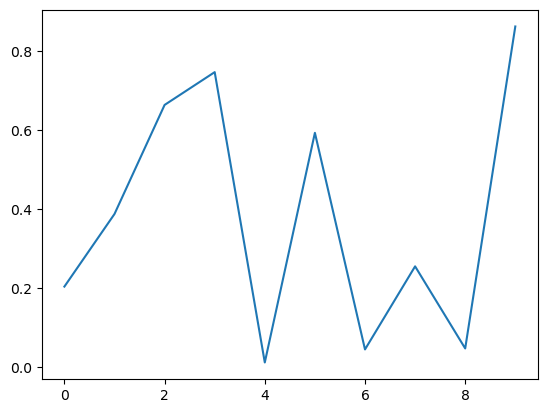

In [22]:
# import matplotlib.pyplot as plt
# import numpy as np
# import time

# Инициализация на графика
fig, ax = plt.subplots()

# Инициализация на линията за визуализация
line, = ax.plot(np.random.rand(10))

# Дефиниране на функцията, която да се извиква на всеки кадър на анимацията
def update(frame):
    # Изчисляване на новите данни за визуализацията
    new_data = np.random.rand(10)
    
    # Актуализиране на данните на линията
    line.set_ydata(new_data)
#     time.sleep(0.2)
    # Връщане на обновената линия
    return line,

# Създаване на обект за анимацията
ani = FuncAnimation(fig, update, frames= 200, interval=1000)

# Показване на графиката
plt.show()
